In [10]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt

import requests
url=['https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/vehicle/xaa.dat','https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/vehicle/xab.dat', 'https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/vehicle/xac.dat','https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/vehicle/xad.dat','https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/vehicle/xae.dat', 'https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/vehicle/xaf.dat', 'https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/vehicle/xag.dat', 'https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/vehicle/xah.dat', 'https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/vehicle/xai.dat']
data_by_line =[]
data=""

for perm in url:
    response = requests.get(perm)
    data += response.text 
data_by_line=(data.split('\n'))
print(data_by_line)
print(len(data_by_line))
data_by_line.remove('')  #there is an extra line, so remove it
print(len(data_by_line))
print(data_by_line)

print(data_by_line[0])
y=[]
x=[]
for i in range(0,len(data_by_line)-1): 
    data_by_line[i] = ' '.join(data_by_line[i].split()) 
    data_by_line[i] = data_by_line[i].split(' ')  
    print(data_by_line[i][18])
    y.append(data_by_line[i][18]) #last column is the target so assign it to y
    x.append(data_by_line[i][0:18]) # the first 18

    #for j in range(0, 18):
        #print(data_by_line[i][j])
    for j in range(0, 18):
        element = data_by_line[i][j]
        #print(i, j, element)
        x[i][j] = int(element)

['95 48 83 178 72 10 162 42 20 159 176 379 184 70 6 16 187 197 van ', '91 41 84 141 57 9 149 45 19 143 170 330 158 72 9 14 189 199 van ', '104 50 106 209 66 10 207 32 23 158 223 635 220 73 14 9 188 196 saab', '93 41 82 159 63 9 144 46 19 143 160 309 127 63 6 10 199 207 van ', '85 44 70 205 103 52 149 45 19 144 241 325 188 127 9 11 180 183 bus ', '107 57 106 172 50 6 255 26 28 169 280 957 264 85 5 9 181 183 bus ', '97 43 73 173 65 6 153 42 19 143 176 361 172 66 13 1 200 204 bus ', '90 43 66 157 65 9 137 48 18 146 162 281 164 67 3 3 193 202 van ', '86 34 62 140 61 7 122 54 17 127 141 223 112 64 2 14 200 208 van ', '93 44 98 197 62 11 183 36 22 146 202 505 152 64 4 14 195 204 saab', '86 36 70 143 61 9 133 50 18 130 153 266 127 66 2 10 194 202 van ', '90 34 66 136 55 6 123 54 17 118 148 224 118 65 5 26 196 202 saab', '88 46 74 171 68 6 152 43 19 148 180 349 192 71 5 11 189 195 bus ', '89 42 85 144 58 10 152 44 19 144 173 345 161 72 8 13 187 197 van ', '94 49 79 203 71 5 174 37 21 154 196 4

In [14]:
dfx = pd.DataFrame(x, columns = ['compactness', 'circularity', 'distance circularity', 'radius ratio', 'pr.axis aspect ratio', 'max length aspect ratio', 'scatter ratio', 'elongatedness', 'pr axis rectangularity', 'max length rectangularity', 'scaled variance MAJOR AXIS', 'scaled variance MINOR AXIS', 'scaled radious of gyration', 'skewness about major axis', 'skewness about minor axis', 'kurtosis about minor axis', 'kurtosis about major axis', 'hollows ratio'], )
dfy=pd.DataFrame(y, columns = ['vehicle class'])
#plt.histogram()

dfall = pd.concat([dfx, dfy], axis=1, join='inner')
dfx.skew()

compactness                   0.379439
circularity                   0.262021
distance circularity          0.104986
radius ratio                  0.389976
pr.axis aspect ratio          3.821908
max length aspect ratio       6.779439
scatter ratio                 0.606293
elongatedness                 0.046447
pr axis rectangularity        0.771073
max length rectangularity     0.255280
scaled variance MAJOR AXIS    0.653124
scaled variance MINOR AXIS    0.835780
scaled radious of gyration    0.279064
skewness about major axis     2.071636
skewness about minor axis     0.772643
kurtosis about minor axis     0.691256
kurtosis about major axis     0.246930
hollows ratio                -0.228617
dtype: float64

[5.23511394e-01 1.68028154e-01 1.05552212e-01 6.56513218e-02
 5.06132819e-02 2.96711951e-02 1.98048907e-02 1.22782685e-02
 8.77781554e-03 5.07730659e-03 3.49786111e-03 2.43686710e-03
 1.94056318e-03 1.18782498e-03 8.89049353e-04 7.17701416e-04
 3.44111321e-04 2.01814238e-05]
{'opel': 0, 'bus': 1, 'saab': 2, 'van': 3}


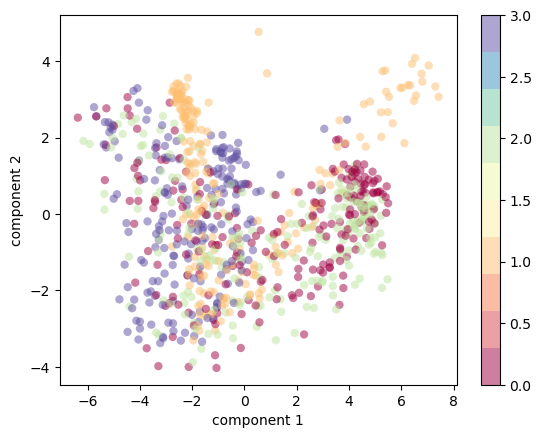

In [12]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=True, with_std=True)
dfx_scaled = scaler.fit_transform(dfx)
pca = PCA()
dfx_pca = pca.fit_transform(dfx_scaled)

explained_variance= pca.explained_variance_ratio_
print(explained_variance)
pca=PCA(n_components=2)
components = pca.fit_transform(dfx_scaled)
y_list = dfy['vehicle class'].tolist()
d = {ni: indi for indi, ni in enumerate(set(y_list))}
numbers = [d[ni] for ni in y_list]
#print(y_list)
print(d)
#print(numbers)
plt.scatter(components[:, 0], components[:, 1],
            c=numbers, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
#print(numbers)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();